## Bank Marketing Campaign | Logistic Regression & Decision Tree

In [160]:
## Database Phase
import pandas as pd
import numpy as np

# Machine Learning Phase
import statsmodels.api as sm
import xgboost as xgb
import sklearn 
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, f1_score, precision_score,confusion_matrix, accuracy_score,roc_auc_score,classification_report,roc_curve

#Visualization Phase
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data
df=pd.read_csv("data/Deposit_bank_data.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.shape

(11162, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
# To get a concise summary of the dataframe
df.info()
## nfo tells us that there are no null values in dataset
## only 7 features are numerical
## 10 fetaures are categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
# check null values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [10]:
# check the categorical features
catg_features=[col for col in df.columns if ((df[col].dtypes=='O') & (col not in ['deposit']))]
print(catg_features)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [9]:
# check the numerical features
num_features=[col for col in df.columns if ((df[col].dtypes!='O') & (col not in ['deposit']))]
num_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [12]:
# check the unique value of categorical features 
for features in catg_features:
    print('The feature is {} and number of categories are {}'.format(features,len(df[features].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


## Exploratory Data Anlaysis

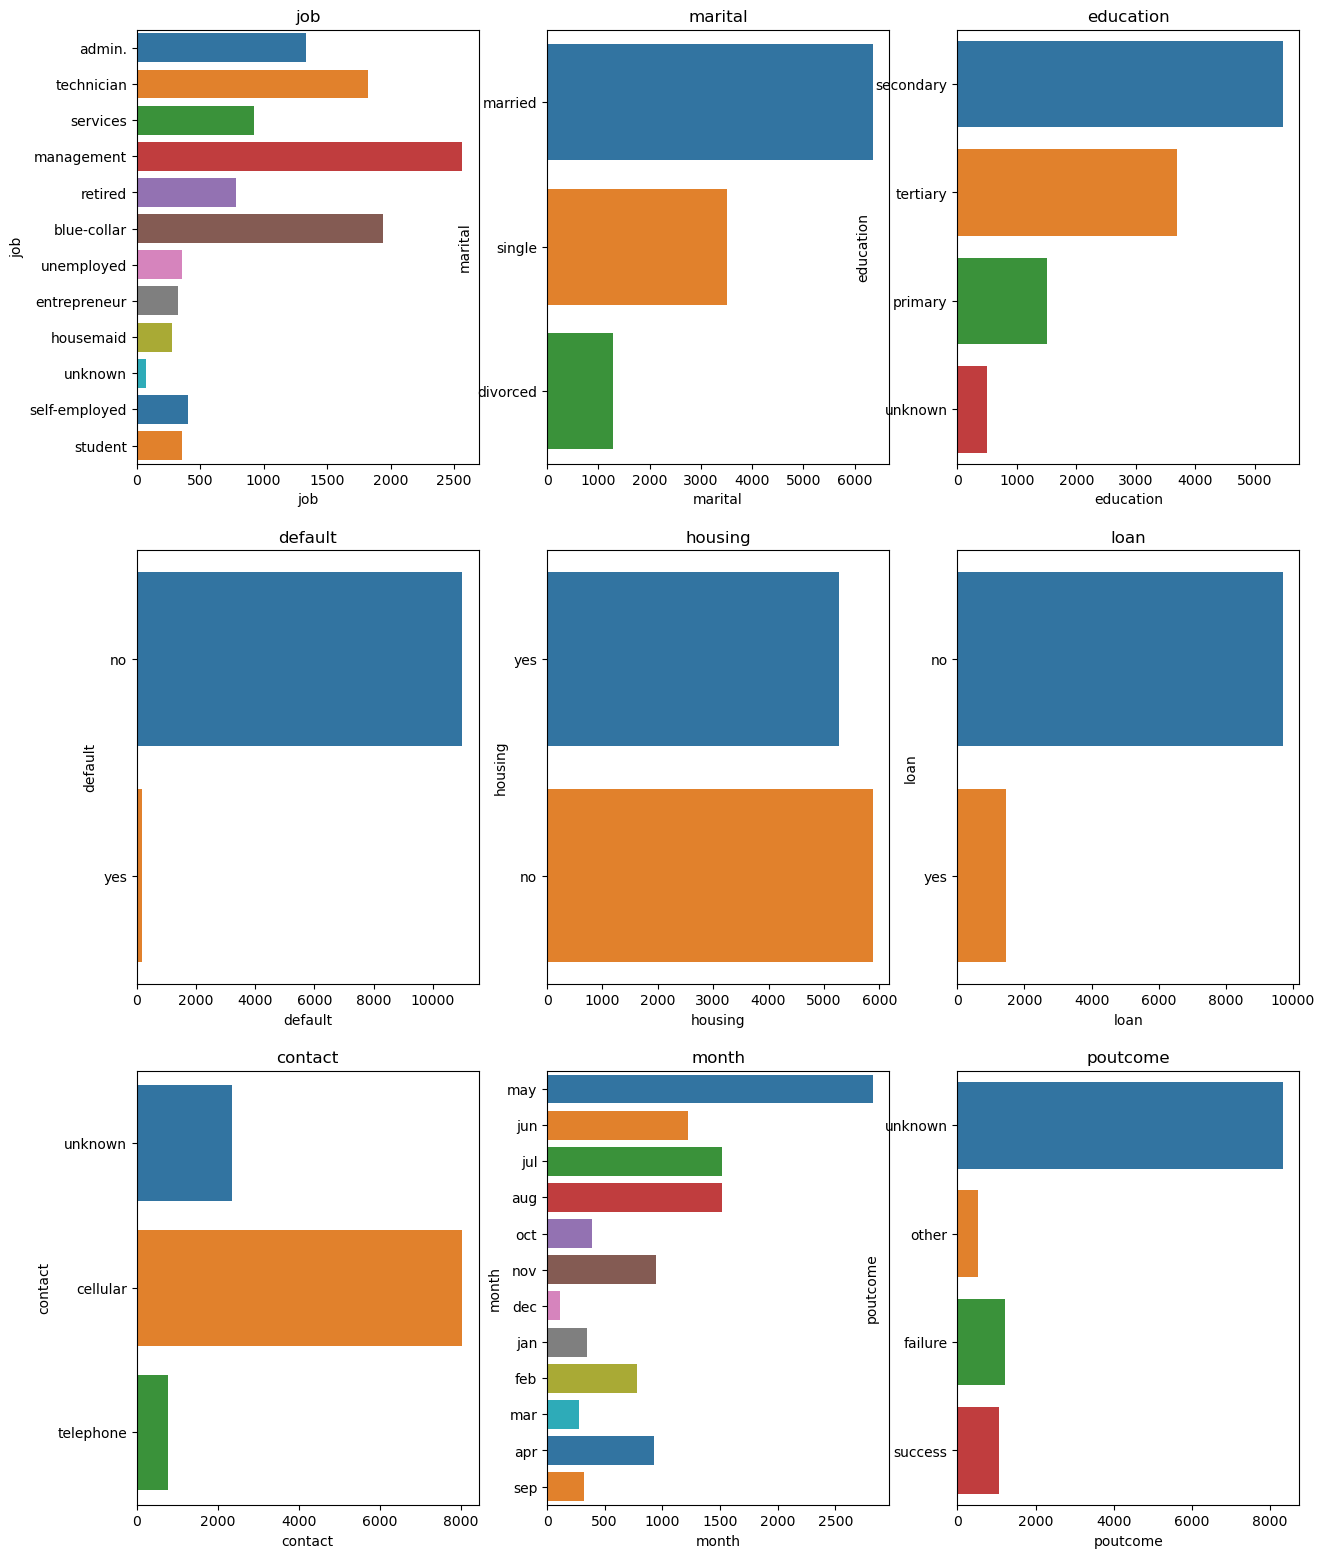

In [23]:
# Univariant Analysis of categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for features in catg_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=features,data=df, palette=colors)
    plt.xlabel(features)
    plt.title(features)
    plotnumber+=1
plt.savefig('images/deposit/catg_analysis.png')
plt.show()

In [ ]:
# Take-away:
# client with job type as management records are high in given dataset and housemaid are very less
# client who married are high in records in given dataset and divorced are less
# client whoes education background is secondary are in high numbers in given dataset
# defualt feature seems to be does not play importand role as it has value of no at high ratio to value yes which can drop
# data in month of may is high and less in dec

In [ ]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [32]:
# plot relationship between catgeorical features and target column deposit
def create_countplot(data, feature, palette, save_path):
    plt.figure(figsize=(14, 5))
    sns.countplot(x=feature, hue='deposit', data=data, palette=palette)
    plt.savefig(save_path)
    plt.show()

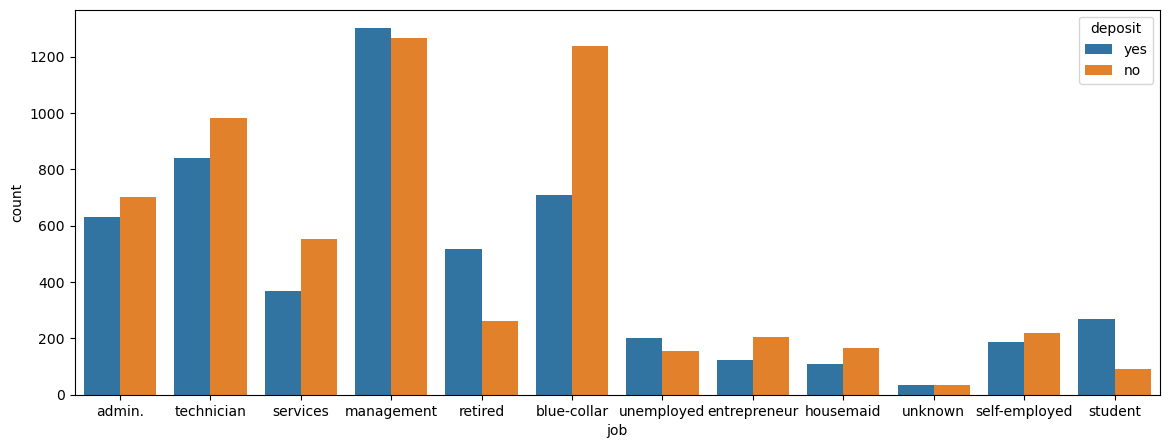

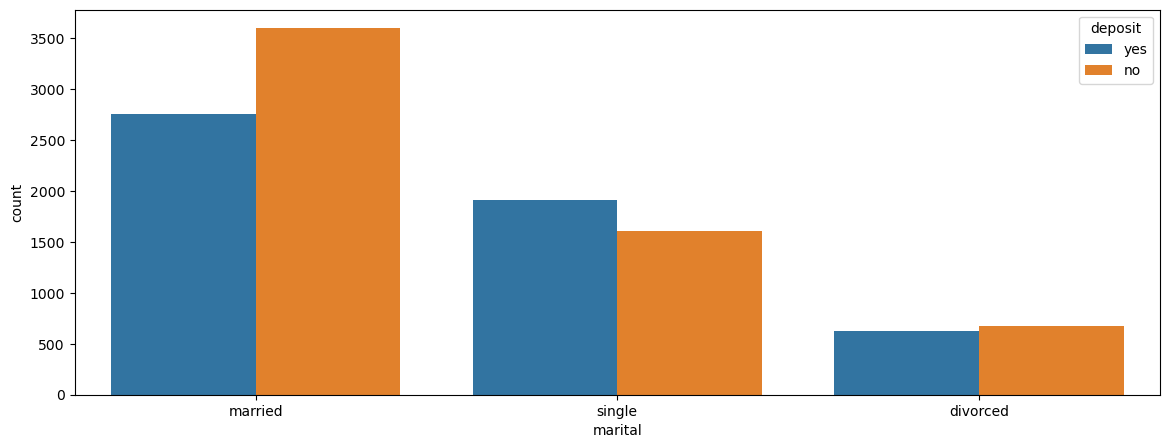

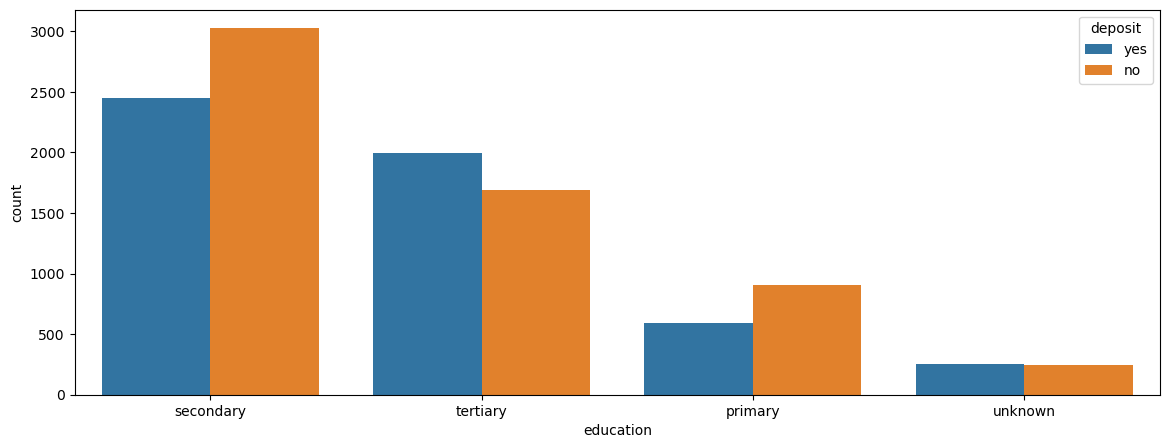

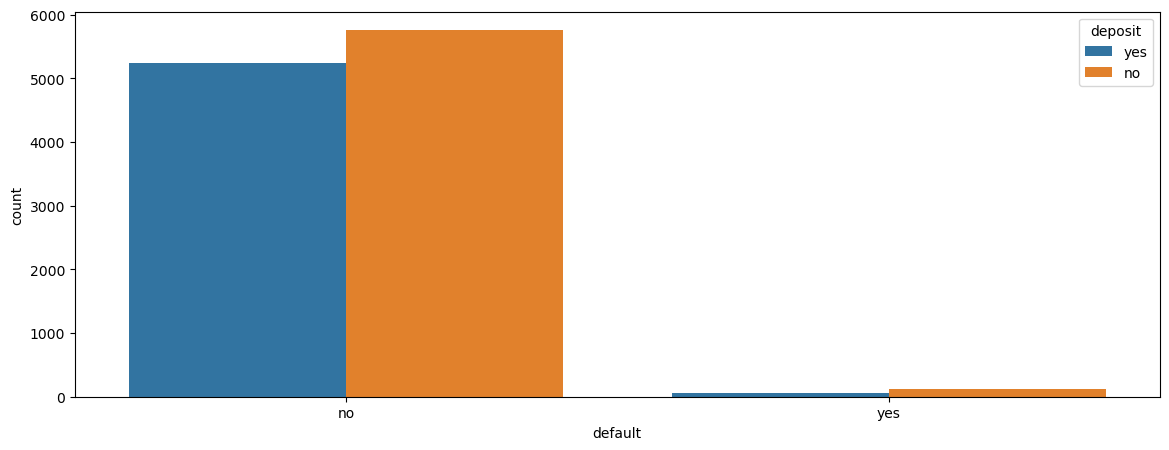

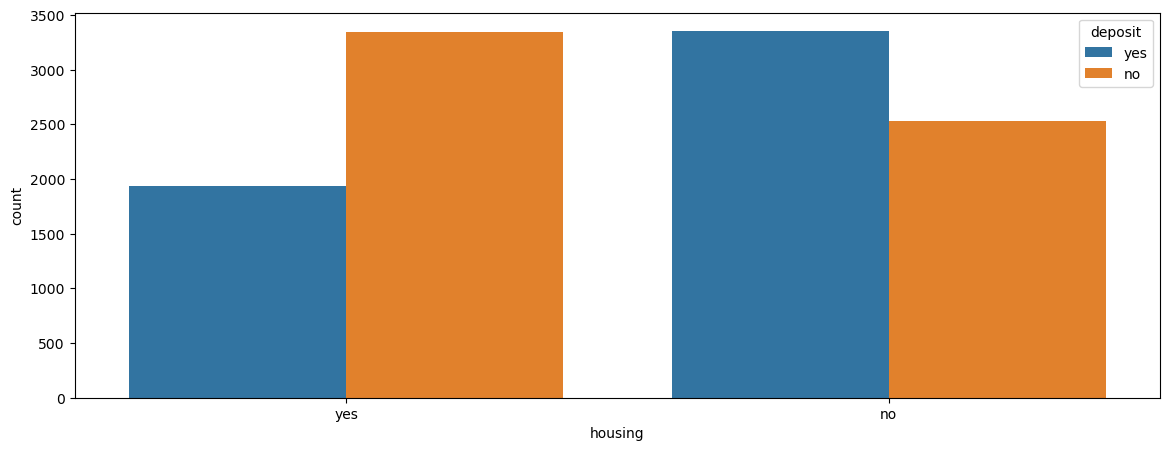

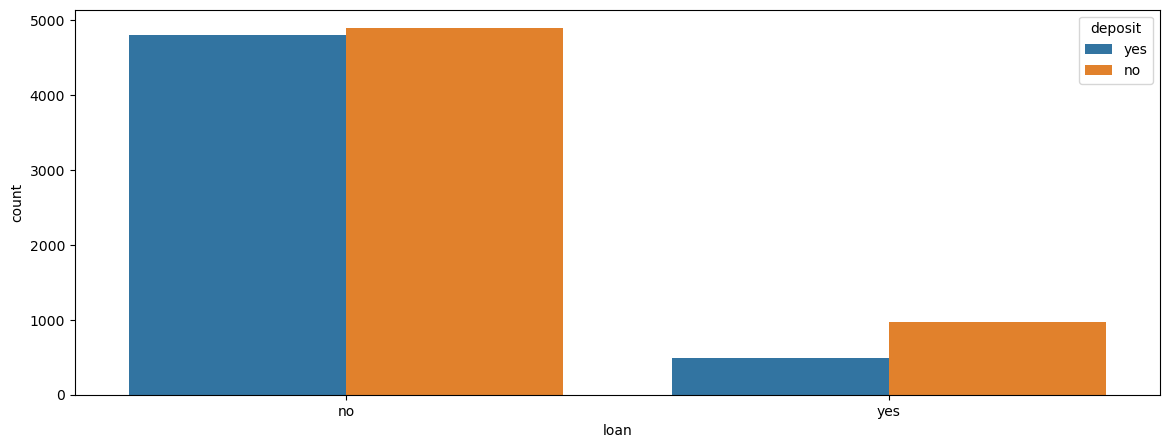

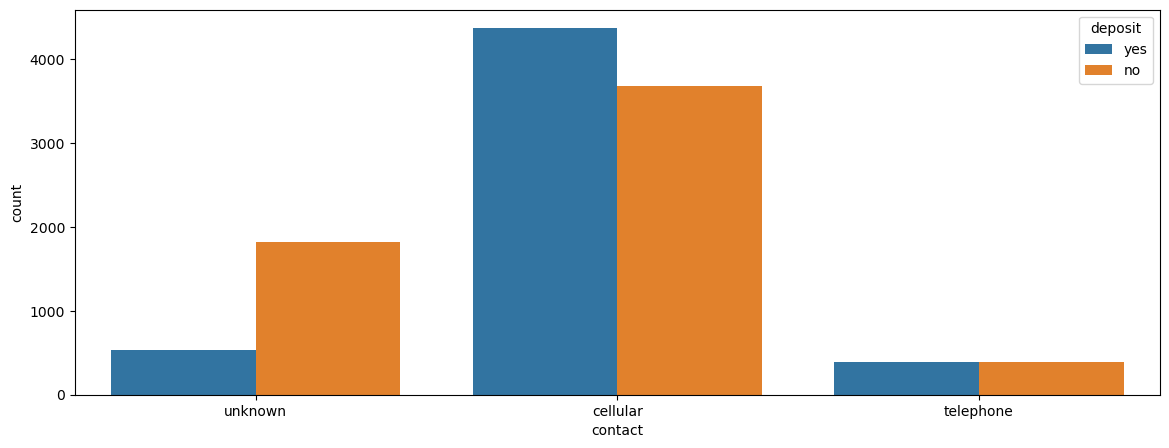

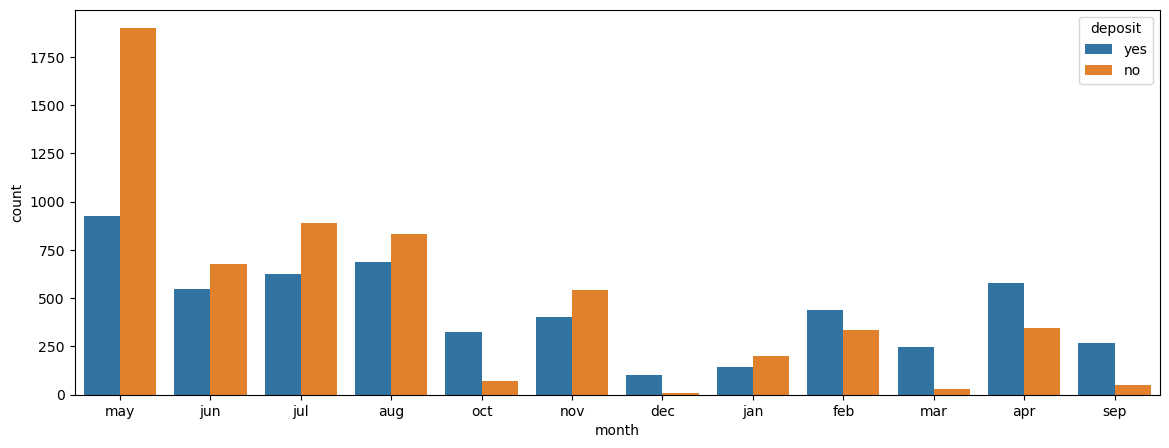

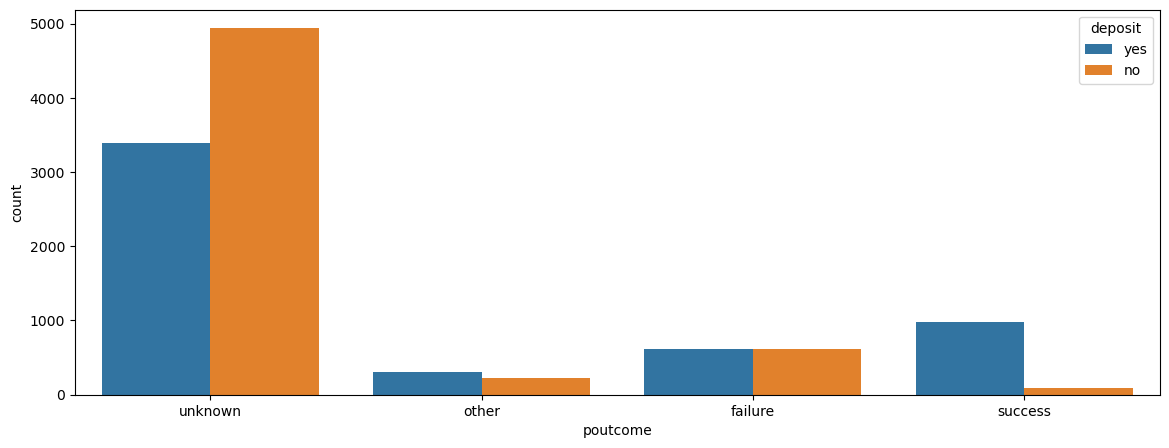

In [33]:
# Define a list of custom colors
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
#           '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Define a list of categorical features to plot
cat_features = ['job', 'marital', 'education','default','housing','loan', 'contact', 'month', 'poutcome']

# Loop over the categorical features and call the function for each one
for feature in cat_features:
    save_path = f'images/deposit/{feature}VSdeposit.png'
    create_countplot(df, feature, colors, save_path)


In [ ]:
# retired client has high interest on deposit
# client who has housing loan seems to be not interested much on deposit
# if pre campagin outcome that is poutcome=success then, there is high chance of client to show interest on deposit
# in month of March, September, October and December, client show high interest to deposit
# in month of may, records are high but client interst ratio is very less

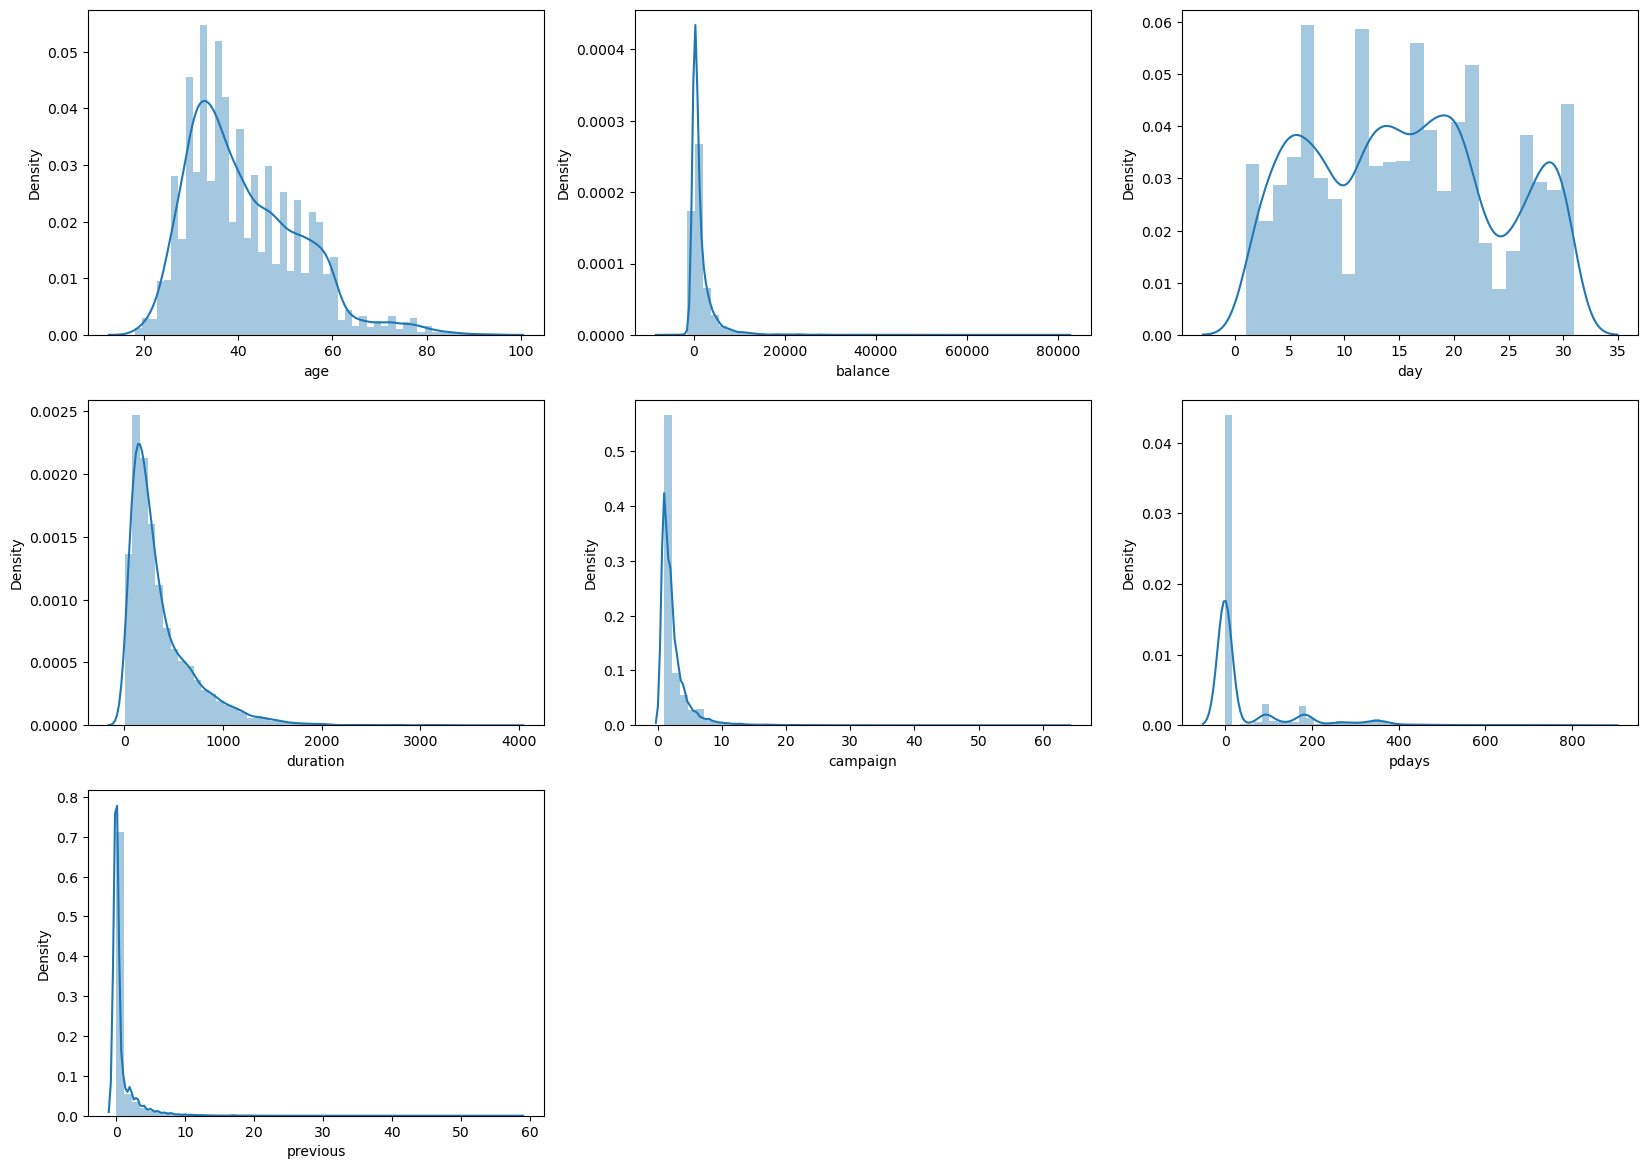

In [38]:
# Univariant Analysis of Numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
colors = ['#1f77b4', '#ff7f0e']
for num_feature in num_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[num_feature],color=colors[0])
    plt.xlabel(num_feature)
    plotnumber+=1
plt.savefig('images/deposit/num_analysis.png')
plt.show()

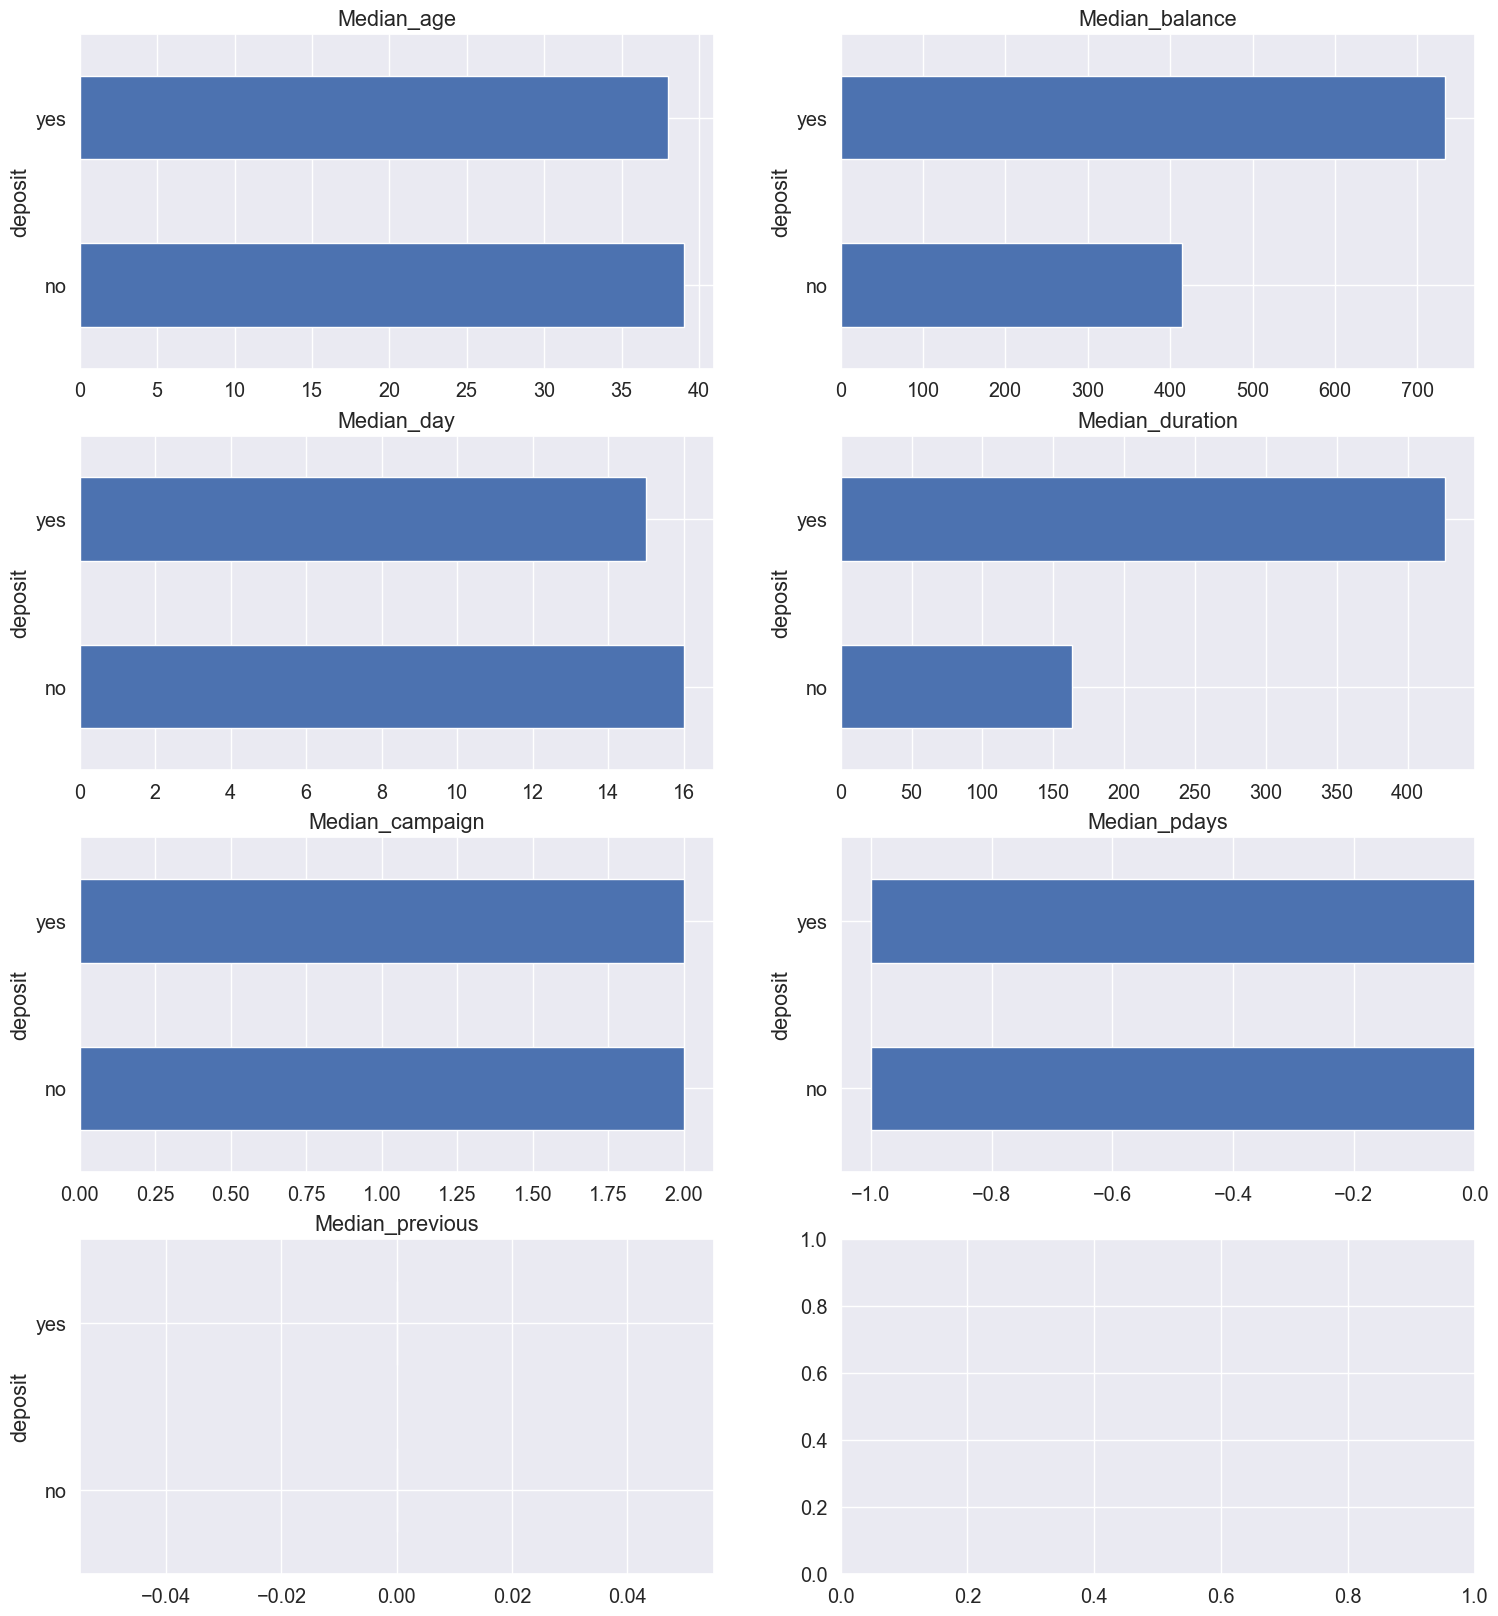

In [41]:
# relation between numerical and target varible deposit
# Create a grid of subplots
sns.set(font_scale=1.3)
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
axes = [ax for axes_row in axes for ax in axes_row]

# Plot the median values of each numerical variable grouped by the target variable
for i, c in enumerate(num_features):
    df.groupby('deposit')[c].median().plot(kind='barh', title=f'Median_{c}', ax=axes[i])
    plt.savefig(f'images/deposit/Median_{c}.png')


In [ ]:
# #Observations
# Higher the bank balance more likely to subscribe
# Higher the last contacted call duration more likely to subscribe
# Older people are more likely to take the term deposit subscription

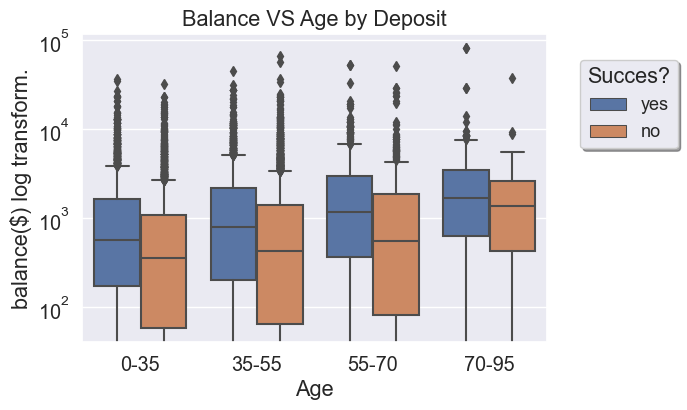

In [44]:
## check relation between age and balances
df['age_cate'] = pd.cut(df['age'], bins=[0, 35, 55, 70, float('Inf')], labels=['0-35', '35-55', '55-70', '70-95'])
plt.figure(figsize=(6,4))
sns.boxplot(x='age_cate', y='balance', hue='deposit', data=df)
plt.ylabel('balance($) log transform.')
plt.xlabel('Age')
plt.title('Balance VS Age by Deposit')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.3, 0.6), title='Succes?', loc = 'lower right', fontsize=13, fancybox=True, shadow=True, frameon=True)
plt.savefig(f'images/deposit/ageVSbalance.png')
plt.show()

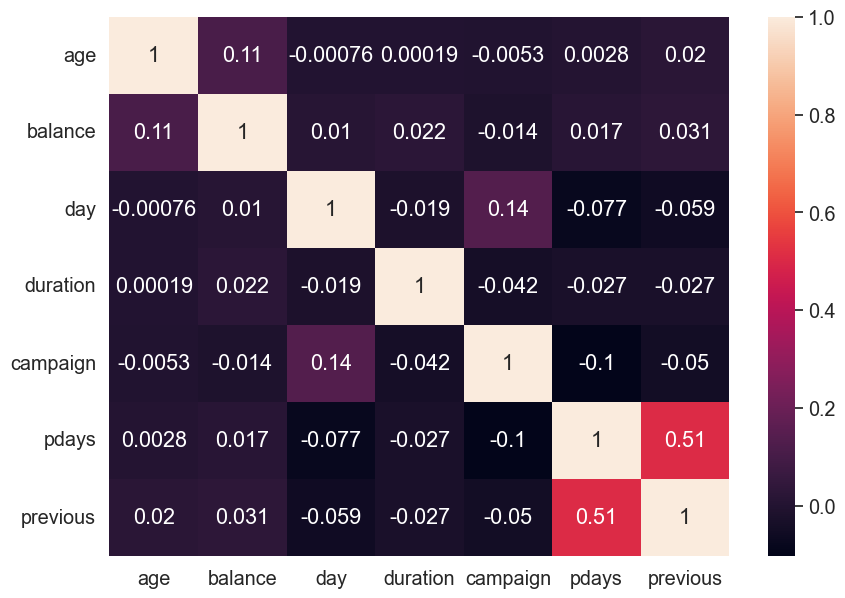

In [58]:
plt.figure(figsize=(10, 7))
_ = sns.heatmap(df[num_features].corr(), annot=True)
plt.savefig(f'images/deposit/correlation.png')

## Treating the Outliers- Data Cleaning

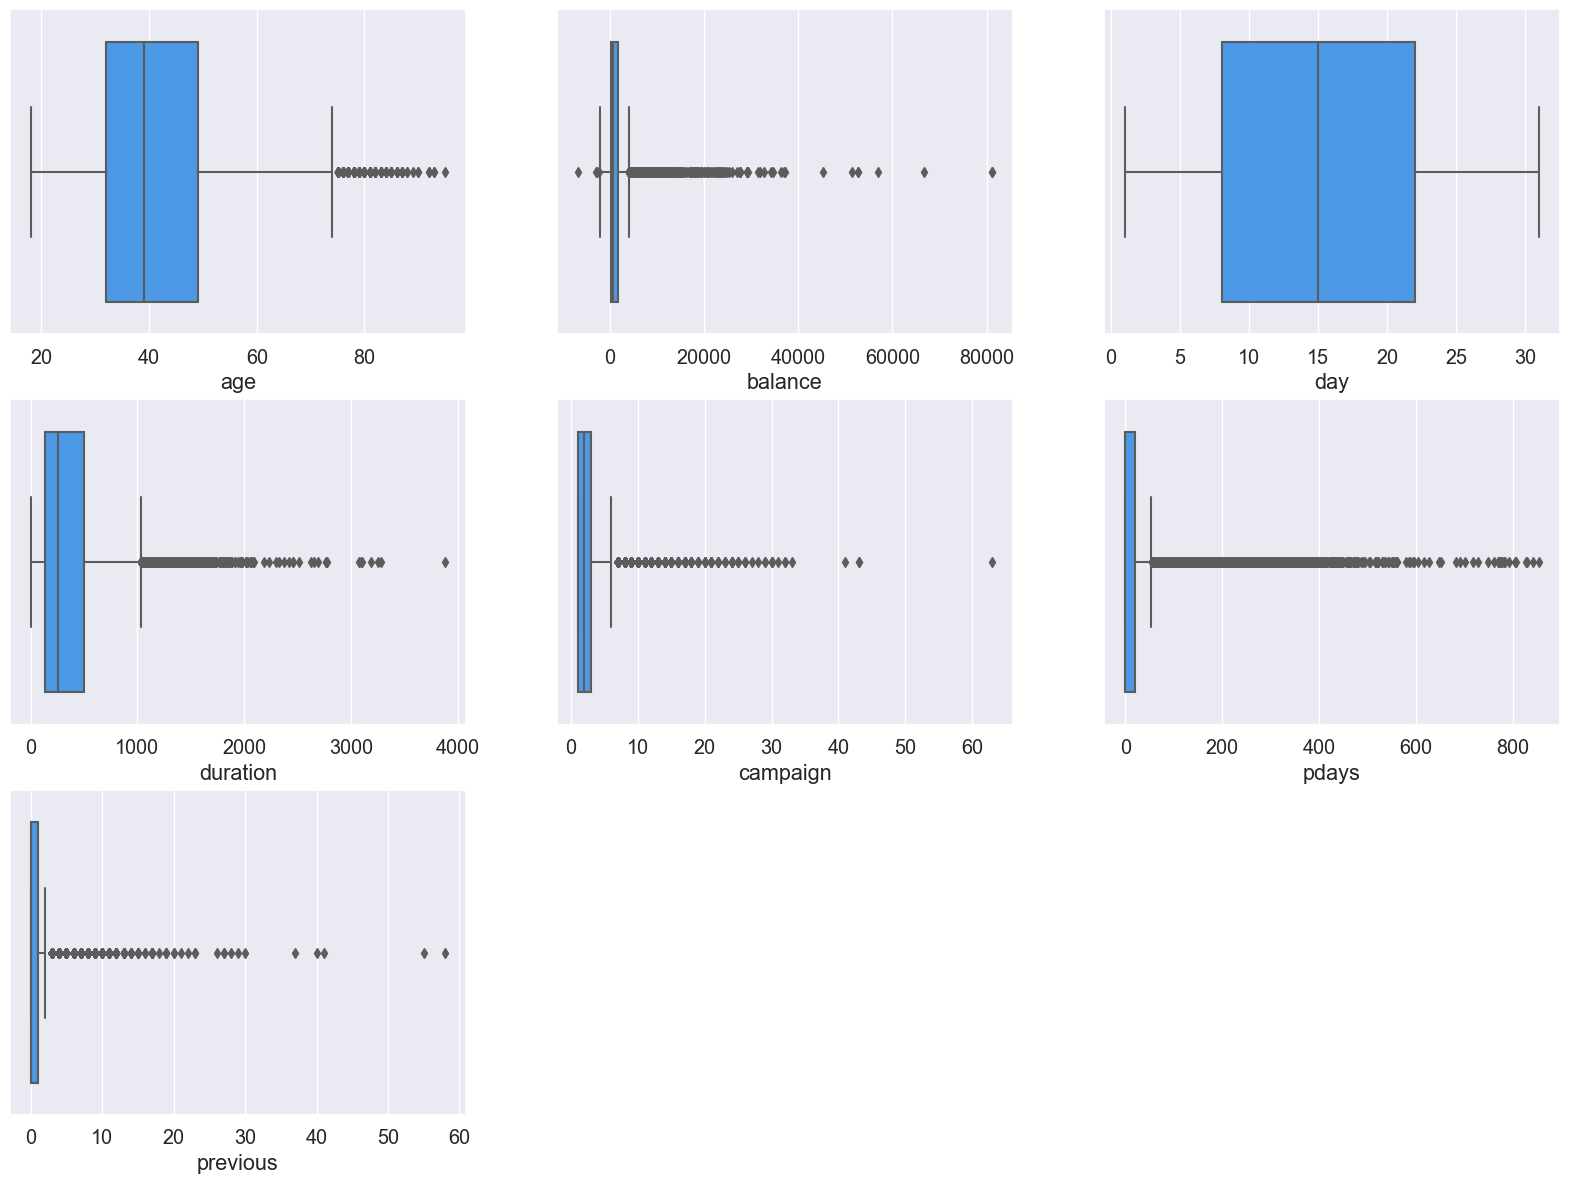

In [46]:
## Find outlier
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
color = '#3399FF'
for num_feature in num_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[num_feature],color=color)
    plt.xlabel(num_feature)
    plotnumber+=1
plt.savefig(f'images/deposit/outliers.png')
plt.show()

In [113]:
# treat outlier for age,duration,campaign
numerical_features=['age','campaign','duration']
for cols in numerical_features:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (df[cols] >= Q1 - 1.5 * IQR) & (df[cols] <= Q3 + 1.5 *IQR)
    df1=df.loc[filter]

In [114]:
df.shape[0],df1.shape[0]

(11162, 10526)

In [ ]:
# ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [115]:
df1=df1[df1['job']!='unknown']
df1.shape

(10458, 18)

In [116]:
df1['education'].value_counts(dropna=False)

secondary    5134
tertiary     3481
primary      1403
unknown       440
Name: education, dtype: int64

In [117]:
df1=df1[df1['education']!='unknown']
df1.shape

(10018, 18)

In [118]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_cate
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,35-55
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,35-55
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes,35-55
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes,55-70
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes,35-55


In [119]:
# df1["pdays"].replace(-1,int(0),inplace=True)
# df1["pdays"].value_counts(dropna=False)  
df1.drop('age_cate',axis=1,inplace=True)

## Data preprocessing

In [ ]:
# converting categorical to numerical - one hot encoding

In [120]:
le=LabelEncoder()
df1['job'] = le.fit_transform(df1["job"])
df1['marital'] = le.fit_transform(df1["marital"])
df1["education"] = le.fit_transform(df1["education"])
df1['default'] = le.fit_transform(df1["default"])
df1['housing'] = le.fit_transform(df1["housing"])
df1['loan'] = le.fit_transform(df1["loan"])
df1["month"] = le.fit_transform(df1["month"])
df1["contact"] = le.fit_transform(df1["contact"])
df1['poutcome'] = le.fit_transform(df1["poutcome"])
df1['deposit'] = le.fit_transform(df1["deposit"])

In [121]:
df1['deposit'].value_counts(dropna=False)  

0    5550
1    4468
Name: deposit, dtype: int64

In [122]:
#split data for scaling
X=df1.drop(columns=["day","deposit"])
Y=df1["deposit"]

In [123]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome
3,55,7,1,1,0,2476,1,0,2,8,579,1,-1,0,3
4,54,0,1,2,0,184,0,0,2,8,673,2,-1,0,3
5,42,4,2,2,0,0,1,1,2,8,562,2,-1,0,3
7,60,5,0,1,0,545,1,0,2,8,1030,1,-1,0,3
8,37,9,1,1,0,1,1,0,2,8,608,1,-1,0,3


## Scaling data using MinMaxScalar

In [124]:
## scaloing the data
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(X).transform(X)

array([[0.48051948, 0.7       , 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.46753247, 0.        , 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.31168831, 0.4       , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.18181818, 0.9       , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.32467532, 0.9       , 0.5       , ..., 0.20233918, 0.0862069 ,
        0.        ],
       [0.20779221, 0.9       , 0.5       , ..., 0.        , 0.        ,
        1.        ]])

## Train and Test Split

In [125]:
#Splitting the dataset into Training set and Test set
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [177]:
Y_train.head()

9929     0
8861     0
1305     1
10775    0
7598     0
Name: deposit, dtype: int32

## 1. Logistic Regression -sklearn

In [129]:
# logistics using sk-learn
## Logistic Regression
logistic_model = LogisticRegression(random_state=30)
logistic_model=logistic_model.fit(X_train,Y_train)
#Making prediction
y_pred_lg = logistic_model.predict(X_test)
y_pred_prob_lg = logistic_model.predict_proba(X_test)[:,1]

In [132]:
recall_score_sk= recall_score(Y_test, y_pred_lg)
print("Recall_Score : ", recall_score_sk)
precision_score_sk= precision_score(Y_test, y_pred_lg)
print("precision_score : ", precision_score_sk)
f1_score_sk= f1_score(Y_test, y_pred_lg)
print("f1_Score :", f1_score_sk)
accuracy_score_sk= accuracy_score(Y_test, y_pred_lg)
print("Accuracy_Score :",accuracy_score_sk)
roc_auc_score_sk = roc_auc_score(y_pred_lg, Y_test)
print("ROC_AUC Score:",roc_auc_score_sk)

Recall_Score :  0.6946651532349603
Recall_Score :  0.7463414634146341
f1_Score : 0.7195767195767195
Accuracy_Score : 0.7619760479041916
ROC_AUC Score: 0.759572758734344


In [134]:
print(classification_report(y_pred_lg, Y_test))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1184
           1       0.69      0.75      0.72       820

    accuracy                           0.76      2004
   macro avg       0.75      0.76      0.76      2004
weighted avg       0.77      0.76      0.76      2004



## 2.Logistic Regressionn -statsmodels

In [136]:
lr_model = sm.Logit(Y_train, X_train)
result = lr_model.fit()
y_pred = result.predict(X_test)
threshold = 0.5
y_pred[y_pred < threshold] = 0
y_pred[y_pred >= threshold] = 1
accuracy = accuracy_score(Y_test, y_pred)

Optimization terminated successfully.
         Current function value: 0.474947
         Iterations 6


In [139]:
recall_score_sm= recall_score(Y_test, y_pred)
print("Recall_Score : ", recall_score_sm)
precision_score_sm= precision_score(Y_test, y_pred)
print("Precision_Score : ", precision_score_sm)
f1_score_sm= f1_score(Y_test, y_pred)
print("f1_Score :", f1_score_sm)
accuracy_score_sm= accuracy_score(Y_test, y_pred)
print("Accuracy_Score :",accuracy_score_sm)
roc_auc_score_sm = roc_auc_score(y_pred_lg, y_pred)
print("ROC_AUC Score:",roc_auc_score_sm)

Recall_Score :  0.7707150964812712
Recall_Score :  0.7637795275590551
f1_Score : 0.7672316384180791
Accuracy_Score : 0.7944111776447106
ROC_AUC Score: 0.8759125741595253


In [144]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1123
           1       0.76      0.77      0.77       881

    accuracy                           0.79      2004
   macro avg       0.79      0.79      0.79      2004
weighted avg       0.79      0.79      0.79      2004



In [ ]:
# ROC curve for both logistic models

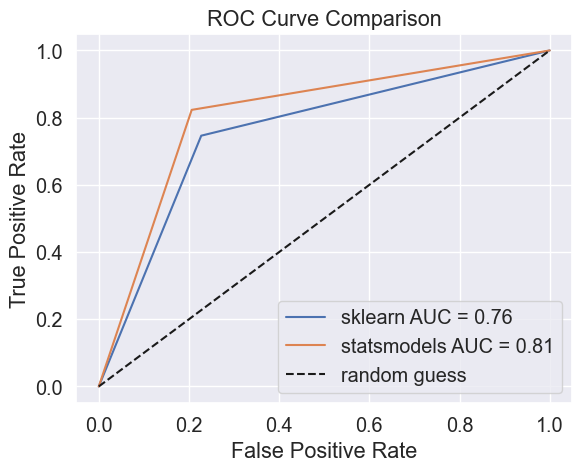

In [178]:
# Calculate false positive rate, true positive rate, and AUC
fpr_sk, tpr_sk, _ = roc_curve(y_pred_lg, Y_test)
roc_auc_sk = roc_auc_score(y_pred_lg, Y_test)
fpr_sm, tpr_sm, _ = roc_curve(y_pred_lg, y_pred)
roc_auc_sm = roc_auc_score(y_pred_lg, y_pred)
plt.plot(fpr_sk, tpr_sk, label=f'sklearn AUC = {roc_auc_sk:.2f}')
plt.plot(fpr_sm, tpr_sm, label=f'statsmodels AUC = {roc_auc_sm:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.savefig(f'images/deposit/logistic.png')
plt.show()

## 3. Random Forest -sklearn

In [147]:
rf_model= RandomForestClassifier(random_state=30)
rf_model= rf_model.fit(X_train, Y_train)
#Making prediction
rf_pred= rf_model.predict(X_test)
rf_pred_proba= rf_model.predict_proba(X_test)[:,1]

In [148]:
recall_score_sk_rf= recall_score(Y_test, rf_pred)
print("Recall_Score : ", recall_score_sk_rf)
precision_score_sk_rf= precision_score(Y_test, rf_pred)
print("Precision : ", precision_score_sk_rf)
f1_score_sk_rf= f1_score(Y_test, rf_pred)
print("f1_Score :", f1_score_sk_rf)
accuracy_score_sk_rf= accuracy_score(Y_test, rf_pred)
print("Accuracy_Score :",accuracy_score_sk_rf)
roc_auc_score_sk_rf = roc_auc_score(Y_test,rf_pred)
print("ROC_AUC Score:",roc_auc_score_sk_rf)

Recall_Score :  0.8592508513053349
Precision :  0.8122317596566524
f1_Score : 0.8350799779371209
Accuracy_Score : 0.8507984031936128
ROC_AUC Score: 0.85170913001598


In [149]:
print(classification_report(Y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1123
           1       0.81      0.86      0.84       881

    accuracy                           0.85      2004
   macro avg       0.85      0.85      0.85      2004
weighted avg       0.85      0.85      0.85      2004



## 4. Random forest -XG boost

In [156]:
dtrain = xgb.DMatrix(X_train, label=Y_train)
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'n_estimators': 100,
    'seed': 42
}
xgbc = xgb.train(params, dtrain)

dtest = xgb.DMatrix(X_test)
y_pred_xg = xgbc.predict(dtest)
y_pred_xg[y_pred_xg < 0.5] = 0
y_pred_xg[y_pred_xg >= 0.5] = 1
accuracy = accuracy_score(Y_test, y_pred_xg)
print('Accuracy:', accuracy)

[21:09:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimators" } are not used.

Accuracy: 0.8512974051896207


In [158]:
recall_score_xg= recall_score(Y_test, y_pred_xg)
print("Recall_Score : ", recall_score_xg)
precision_score_xg= precision_score(Y_test, y_pred_xg)
print("Precision : ", precision_score_xg)
f1_score_xg= f1_score(Y_test, y_pred_xg)
print("f1_Score :", f1_score_xg)
accuracy_score_xg= accuracy_score(Y_test, y_pred_xg)
print("Accuracy_Score :",accuracy_score_xg)
roc_auc_score_xg = roc_auc_score(Y_test,y_pred_xg)
print("ROC_AUC Score:",roc_auc_score_xg)

Recall_Score :  0.8535754824063564
Precision :  0.8165038002171553
f1_Score : 0.8346281908990012
Accuracy_Score : 0.8512974051896207
ROC_AUC Score: 0.8515428614168915


In [157]:
print(classification_report(Y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1123
           1       0.82      0.85      0.83       881

    accuracy                           0.85      2004
   macro avg       0.85      0.85      0.85      2004
weighted avg       0.85      0.85      0.85      2004



## 5. Decision Tree -sklearn

In [161]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
y_pred_d= clf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_d)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7729540918163673


In [164]:
recall_score_d= recall_score(Y_test, y_pred_d)
print("Recall_Score : ", recall_score_d)
precision_score_d= precision_score(Y_test, y_pred_d)
print("Precision : ", precision_score_d)
f1_score_d= f1_score(Y_test, y_pred_d)
print("f1_Score :", f1_score_d)
accuracy_score_d= accuracy_score(Y_test, y_pred_d)
print("Accuracy_Score :",accuracy_score_d)
roc_auc_score_d = roc_auc_score(Y_test,y_pred_d)
print("ROC_AUC Score:",roc_auc_score_d)

Recall_Score :  0.7366628830874007
Precision :  0.7442660550458715
f1_Score : 0.7404449515116942
Accuracy_Score : 0.7729540918163673
ROC_AUC Score: 0.7690438191038071


In [165]:
print(classification_report(Y_test, y_pred_d))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1123
           1       0.74      0.74      0.74       881

    accuracy                           0.77      2004
   macro avg       0.77      0.77      0.77      2004
weighted avg       0.77      0.77      0.77      2004



## 5. Decision Tree -xgboost

In [163]:
clf = xgb.XGBClassifier()
clf.fit(X_train, Y_train)
y_pred_dxgb = clf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_dxgb)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8502994011976048


In [166]:
recall_score_dxg= recall_score(Y_test, y_pred_dxgb)
print("Recall_Score : ", recall_score_dxg)
precision_score_dxg= precision_score(Y_test, y_pred_dxgb)
print("Precision : ", precision_score_dxg)
f1_score_dxg= f1_score(Y_test, y_pred_dxgb)
print("f1_Score :", f1_score_dxg)
accuracy_score_dxg= accuracy_score(Y_test, y_pred_dxgb)
print("Accuracy_Score :",accuracy_score_dxg)
roc_auc_score_dxg = roc_auc_score(Y_test,y_pred_dxgb)
print("ROC_AUC Score:",roc_auc_score_dxg)

Recall_Score :  0.8513053348467651
Precision :  0.8161044613710555
f1_Score : 0.8333333333333333
Accuracy_Score : 0.8502994011976048
ROC_AUC Score: 0.8504077876370958


In [168]:
print(classification_report(Y_test, y_pred_dxgb))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1123
           1       0.82      0.85      0.83       881

    accuracy                           0.85      2004
   macro avg       0.85      0.85      0.85      2004
weighted avg       0.85      0.85      0.85      2004



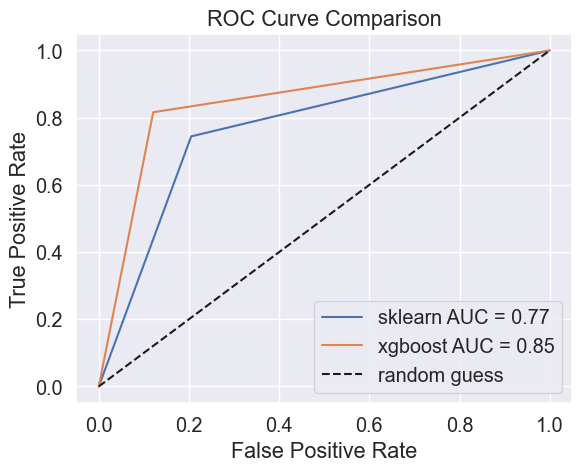

In [184]:
fpr_sk, tpr_sk, _ = roc_curve(y_pred_d, Y_test)
roc_auc_sk = roc_auc_score(y_pred_d, Y_test)
fpr_sm, tpr_sm, _ = roc_curve(y_pred_dxgb, Y_test)
roc_auc_sm = roc_auc_score(y_pred_dxgb, Y_test)
plt.plot(fpr_sk, tpr_sk, label=f'sklearn AUC = {roc_auc_sk:.2f}')
plt.plot(fpr_sm, tpr_sm, label=f'xgboost AUC = {roc_auc_sm:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.savefig(f'images/deposit/decision_tree.png')
plt.legend()
plt.show()

In [172]:
import pandas as pd

# Create a dictionary with the evaluation metrics
metrics = {
    'Model': ['XGBoost', 'Decision Tree'],
    'Accuracy': [accuracy_score_dxg, accuracy_score_d],
    'Precision': [precision_score_dxg, precision_score_d],
    'Recall': [recall_score_dxg, recall_score_d],
    'F1 Score': [f1_score_dxg, f1_score_d],
    'ROC AUC Score': [roc_auc_score_dxg, roc_auc_score_d]
}

# Create a pandas DataFrame from the metrics dictionary
df_metrics = pd.DataFrame(metrics)

# Print the DataFrame
print(df_metrics)


           Model  Accuracy  Precision    Recall  F1 Score  ROC AUC Score
0        XGBoost  0.850299   0.816104  0.851305  0.833333       0.850408
1  Decision Tree  0.772954   0.744266  0.736663  0.740445       0.769044


In [175]:
import pandas as pd

# Create a dictionary of scores
scores = {
    'Model': ['Statsmodel', 'scikit-learn'],
    'Recall': [recall_score_sm, recall_score_sk],
    'Precision': [precision_score_sm, precision_score_sk],
    'F1-score': [f1_score_sm, f1_score_sk],
    'Accuracy': [accuracy_score_sm, accuracy_score_sk],
    'ROC-AUC': [roc_auc_score_sm, roc_auc_score_sk]
}

# Convert the dictionary to a pandas dataframe
scores_df = pd.DataFrame(scores)

# Set the 'Model' column as the index
scores_df.set_index('Model', inplace=True)

# Display the dataframe
print(scores_df)


                Recall  Precision  F1-score  Accuracy   ROC-AUC
Model                                                          
Statsmodel    0.770715   0.763780  0.767232  0.794411  0.875913
scikit-learn  0.694665   0.746341  0.719577  0.761976  0.759573
